In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Outlier Detection

In [ ]:
ca_house = pd.read_csv("./sample_data/california_housing_train.csv")

In [ ]:
ca_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


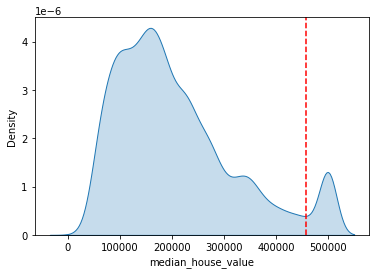

In [ ]:
sns.kdeplot(ca_house["median_house_value"], fill=True)
plt.axvline(np.quantile(ca_house["median_house_value"], .94), color='red', linestyle='--')

## Removing with Z-scores

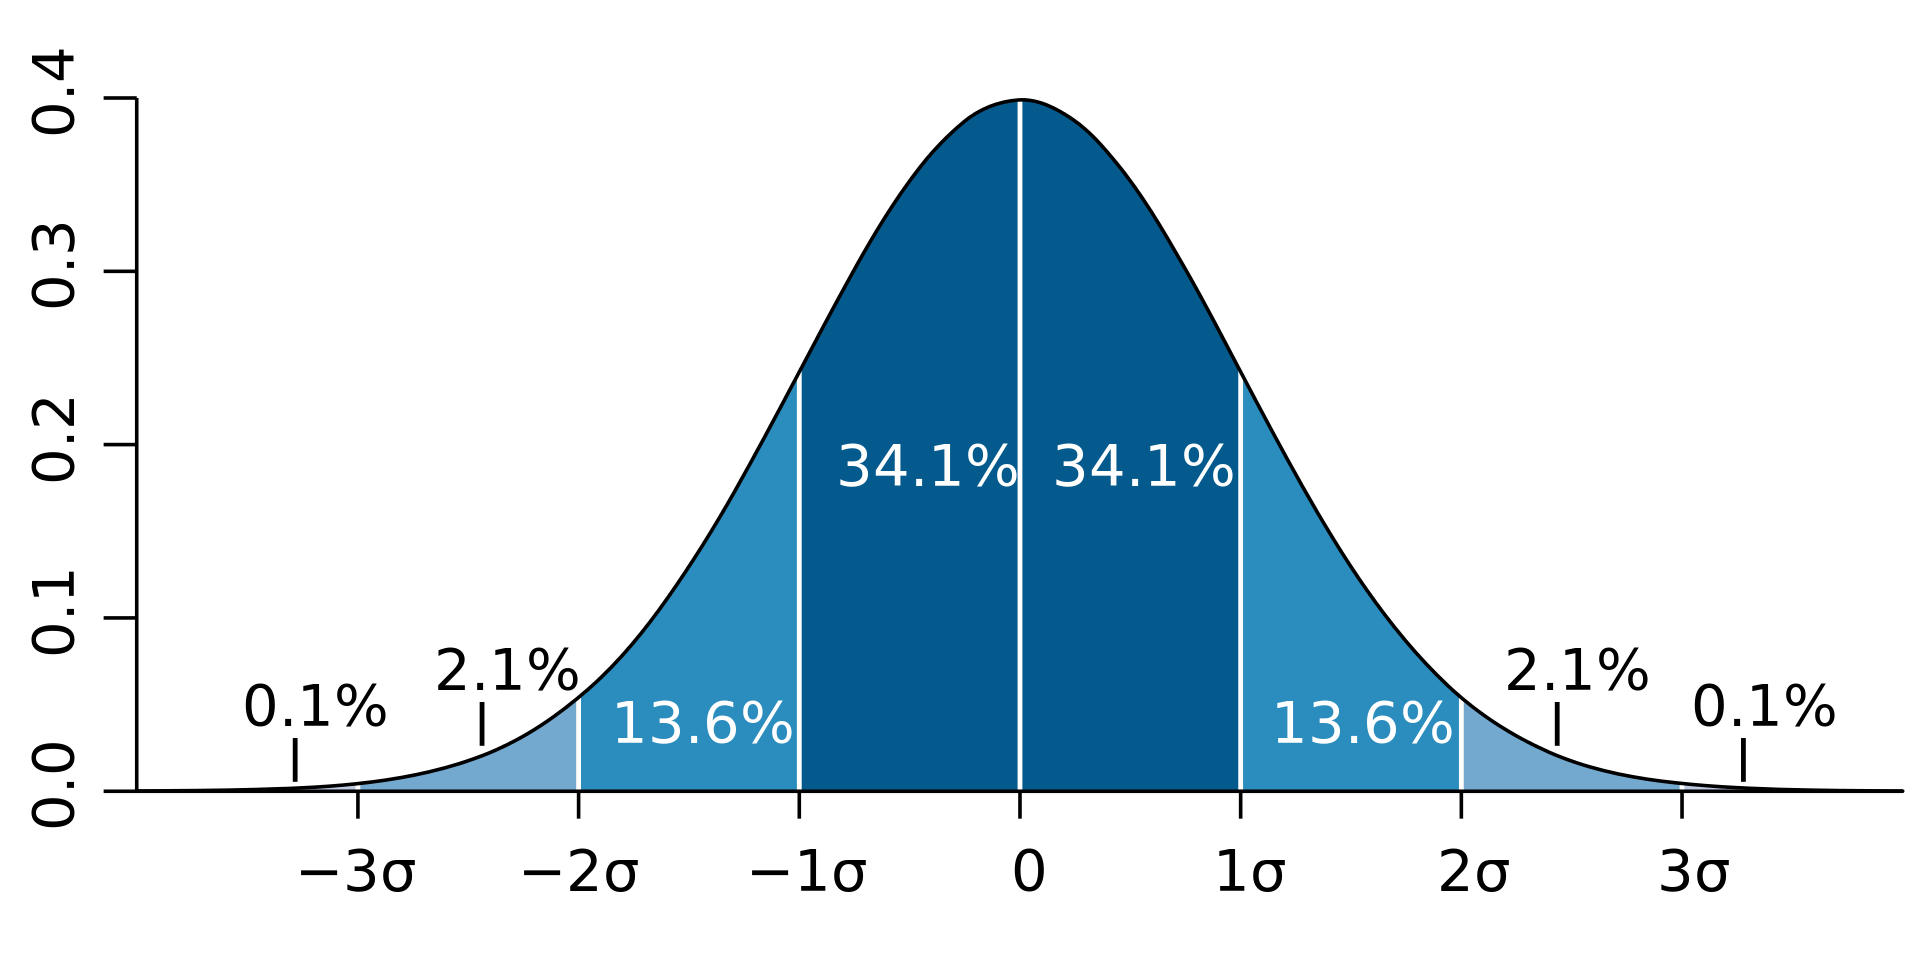

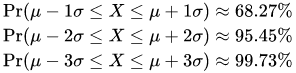

In [ ]:
z_scores = (ca_house["median_house_value"] - ca_house["median_house_value"].mean()) / ca_house["median_house_value"].std()
z_scores = z_scores.values

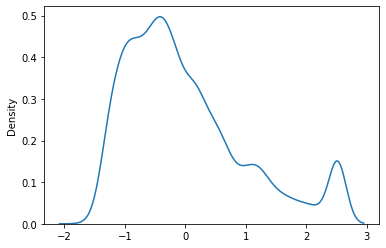

In [ ]:
sns.kdeplot(z_scores)

### Keep inner 95% probability range

In [ ]:
keep = np.where((z_scores > -2.0) & (z_scores < 2.0))

In [ ]:
keep

(array([    0,     1,     2, ..., 16997, 16998, 16999]),)

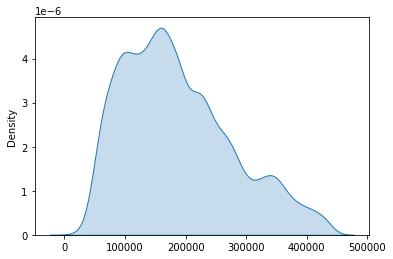

In [ ]:
sns.kdeplot(ca_house["median_house_value"].values[keep], fill=True)

## Quantile technique

In [ ]:
plt.axvline(np.quantile(ca_house["median_house_value"], .94), color='red', linestyle='--')

In [ ]:
lower_bound = np.quantile(ca_house["median_house_value"], 0.01)
upper_bound = np.quantile(ca_house["median_house_value"], 0.99)

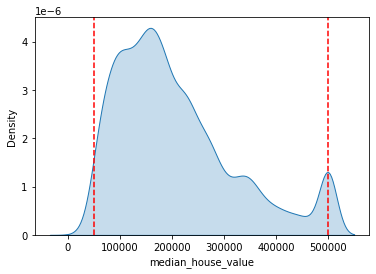

In [ ]:
sns.kdeplot(ca_house["median_house_value"], fill=True)
plt.axvline(lower_bound, color='red', linestyle='--')
plt.axvline(upper_bound, color='red', linestyle='--')

In [ ]:
keep = np.where((ca_house["median_house_value"] > lower_bound) & (ca_house["median_house_value"] <= upper_bound))

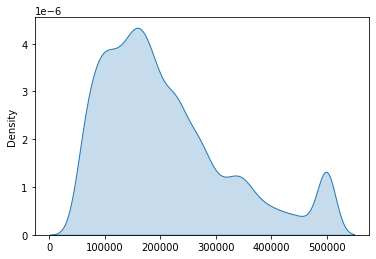

In [ ]:
sns.kdeplot(ca_house["median_house_value"].values[keep], fill=True)
